In [63]:
import pandas as pd
#load data from csv
df_shareholder_relations = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_relations_2021_rows_raw.csv')

df_startups = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/startups_rows_raw.csv')
df_shareholders = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholders_rows_raw.csv') 

len(df_shareholder_relations)

35685

## Create Investment relations Dataframe

Entails all relations between an investor and a startup/company

![image.png](attachment:image.png)



In [64]:
#Taking the df_shareholder_relations and remove duplicate rows
print(f"Length before dropping duplicates {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations.drop_duplicates()
print(f"Length after dropping duplicates{len(df_shareholder_relations)}")


Length before dropping duplicates 35685
Length after dropping duplicates35685


In [65]:
#Taking df_shareholder_relations and remove rows with missing shareholder_name
print(f"Length before dropping missing values {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations.dropna(subset=['shareholder_name'])
print(f"Length after dropping missing values {len(df_shareholder_relations)}")


Length before dropping missing values 35685
Length after dropping missing values 34650


In [66]:
#Take df_shareholder_relations and remove rows with shareholder_name "Summe" or "Gesamt"
print(f"Length before dropping Gesamt and Summe {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations[~df_shareholder_relations['shareholder_name'].str.contains('Summe|Gesamt|Stammkapital|1|2|3|25.000|STAMMKAPITAL|STAMMKAPTAL IN EURO')]
print(f"Length after dropping Gesamt and Summe {len(df_shareholder_relations)}")


Length before dropping Gesamt and Summe 34650
Length after dropping Gesamt and Summe 31005


In [67]:
# #Return all rows ehre shareholder_name is TestInc;AG München, HRB 268779
# df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc']

# #Return all startups ids where shareholder_name is TestInc;AG München, HRB 268779
# ids=df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc']['startup_id']


#Return all rows with the startup_ID 
#remove all rows with the startup_id
df_shareholder_relations = df_shareholder_relations[~df_shareholder_relations['shareholder_name'].str.contains('TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc|H\u00f6he EUR":{"0":""}|(name of shareholder)|AG Gütersloh|AG Offenbach am Main|AG Stuttgart|FREIBLEIBEND|FREIBLEIBEND / INTENTIONALLY LEFT BLANK')]

len(df_shareholder_relations)

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_28481/4180297427.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_shareholder_relations = df_shareholder_relations[~df_shareholder_relations['shareholder_name'].str.contains('TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc|H\u00f6he EUR":{"0":""}|(name of shareholder)|AG Gütersloh|AG Offenbach am Main|AG Stuttgart|FREIBLEIBEND|FREIBLEIBEND / INTENTIONALLY LEFT BLANK')]


30908

In [69]:
#remove when shareholder_name and shareholder_id are duplicate
print(f"Length before dropping duplicates {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations.drop_duplicates(subset=['shareholder_name', 'startup_id'])
print(f"Length after dropping duplicates {len(df_shareholder_relations)}")

Length before dropping duplicates 29546
Length after dropping duplicates 29546


In [70]:
#remove substring from shareholder_name and shareholder_name_mapped
df_shareholder_relations['shareholder_name'] = df_shareholder_relations['shareholder_name'].str.replace('Firma |Frau |Herr |Firma', '')  
df_shareholder_relations['shareholder_name_mapped'] = df_shareholder_relations['shareholder_name_mapped'].str.replace('Firma |Frau |Herr |Firma', '')


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_28481/1500586759.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_shareholder_relations['shareholder_name'] = df_shareholder_relations['shareholder_name'].str.replace('Firma |Frau |Herr |Firma', '')
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_28481/1500586759.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_shareholder_relations['shareholder_name_mapped'] = df_shareholder_relations['shareholder_name_mapped'].str.replace('Firma |Frau |Herr |Firma', '')


In [71]:
print(f"Length before dropping duplicates {len(df_shareholder_relations)}")
#drop where shareholder_name_mapped and startup_name are the same
df_shareholder_relations = df_shareholder_relations[~(df_shareholder_relations['shareholder_name_mapped'] == df_shareholder_relations['startup_name'])]
print(f"Length after dropping duplicates {len(df_shareholder_relations)}")

Length before dropping duplicates 29546
Length after dropping duplicates 29439


In [72]:
#drop duplicates where shareholder_name and startup_name are the same
print(f"Length before dropping duplicates {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations.drop_duplicates(subset=['shareholder_name_mapped', 'startup_name'])
print(f"Length after dropping duplicates {len(df_shareholder_relations)}")

Length before dropping duplicates 29439
Length after dropping duplicates 27778


In [73]:
# make column register_mapping tto type int where it is not NaN
df_shareholder_relations['register_mapping'] = df_shareholder_relations['register_mapping'].fillna(0)
df_shareholder_relations['register_mapping'] = df_shareholder_relations['register_mapping'].astype(int)






In [50]:
#add a new column shareholder_type to df_shareholder_relations
df_shareholder_relations['shareholder_type'] = ""
#get the shareholder type for each shareholder_name_mapped from shareholders
for index, row in df_shareholder_relations.iterrows():
    shareholder_name_mapped = row['shareholder_name_mapped']
    shareholder_type = df_shareholders[df_shareholders['shareholder_name_mapped'] == shareholder_name_mapped]['shareholder_type']
    if len(shareholder_type) > 0:
        df_shareholder_relations.at[index, 'shareholder_type'] = shareholder_type.values[0]

df_shareholder_relations.head()

KeyError: 'shareholder_name_mapped'

In [74]:
#safe as csv
df_shareholder_relations.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_relations_2021_rows_cleaned.csv', index=False)

In [76]:
#read df shareholder relation from csv
df_shareholder_relations = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_relations_2021_cleaned_rows_names_mapped.csv')

#Get a  list of a lle shareholder_names and how often they occur
shareholder_name_counts = df_shareholder_relations['shareholder_name_mapped'].value_counts()
print(shareholder_name_counts)
shareholder_name_counts.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_name_counts.csv', sep=';', encoding='utf-8')
#get only the shareholder_names as df and safe as csv
shareholder_names = df_shareholder_relations['shareholder_name_mapped']





# #safe only shareholder_names as csv with semicolon delimiter, encoding so it can be read by excel
# shareholder_names = df_shareholder_relations['shareholder_name']
# shareholder_names.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names.csv', sep=';', encoding='utf-8')


High Tech Gründerfonds GmbH & Co. KG                                                                              66
Atlantic Food Labs Fund I GmbH & Co. KG                                                                           45
HV Growth Fund GmbH & Co. KG                                                                                      30
NRW.BANK                                                                                                          29
Wagnisfinanzierungsge- sellschaft für Technologieförderung in Rhein- land-Pfalz mit beschränkter Haftung (WFT)    28
                                                                                                                  ..
Dr. Loyen, Guido                                                                                                   1
Beaucamp, Silke                                                                                                    1
Prof. Dr. Dirk Mller                                           

In [38]:
# # #safe only shareholder_names as csv with semicolon delimiter, encoding so it can be read by excel
# # shareholder_names = df_shareholder_relations['shareholder_name']
# # shareholder_names.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names.csv', sep=';', encoding='utf-8')
# # print(shareholder_names)

# #read in csv with shareholder_name map
# df_shareholder_name_map = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_name_map_rows.csv')


In [40]:
# #get subset of shareholder_names that are not in shareholder_name_map
# shareholder_names_not_mapped = shareholder_names[~shareholder_names.isin(df_shareholder_name_map['shareholder_name'])]
# print(shareholder_names_not_mapped)
# #add columns to shareholder_names_not_mapped "shareholder_name_mapped"
# shareholder_names_not_mapped = pd.DataFrame(shareholder_names_not_mapped)
# shareholder_names_not_mapped['shareholder_name_map'] = ""

# #safe only shareholder_names as csv with semicolon delimiter
# shareholder_names_not_mapped.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names_not_mapped.csv', sep=';', encoding='utf-8')


24        Pascal Pierre Zambou Zoleko
25                        Sarsar Deli
26                      Ahmad, Naveed
27                       Klaus Gourgé
28                        Thomas Post
                     ...             
35452           Ann Cathrin Schönrock
35453               Franziska Eva Uhl
35485    PD Dr. med. Martin Friedrich
35595      Sebastian Alexander Krüper
35658            Marianne Lucie Höger
Name: shareholder_name, Length: 5397, dtype: object


In [36]:
# df_shareholder_name_map
# #safe shareholder_name_map as csv

# # #unique df of shareholders
# # print(len(shareholder_names))
# # unique_shareholder_names = shareholder_names.drop_duplicates()
# # # print(len(unique_shareholder_names))
# # print(unique_shareholder_names)
# # unique_shareholder_names.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names.csv', sep=';', encoding='utf-8')

,id,created_at,shareholder_name,shareholder_name_map,shareholder_name_mapped
0,1.0,2024-03-07 10:23:27.652261+00,Lukas Röhle Holding UG (haftungsbeschränkt) i....,NaN,NaN
1,2.0,2024-03-07 10:23:27.652261+00,Niklas Brackmann Holding UG (haftungsbeschränk...,NaN,NaN
2,4.0,2024-03-07 10:23:27.652261+00,KUWI KG,NaN,NaN
3,5.0,2024-03-07 10:23:27.652261+00,Fiete Grün ter Holding UG (haftungsbeschränkt)...,NaN,NaN
4,7.0,2024-03-07 10:23:27.652261+00,Mavein GmbH mit Sitz in Hamburg Amtsgericht Ha...,NaN,NaN
...,...,...,...,...,...
28739,NaN,NaN,Ann Cathrin Schönrock,NaN,
28740,NaN,NaN,Franziska Eva Uhl,NaN,
28741,NaN,NaN,PD Dr. med. Martin Friedrich,NaN,
28742,NaN,NaN,Sebastian Alexander Krüper,NaN,


In [77]:
#Add all unique shareholder names from shareholder_relations to df_shareholders 
shareholder_names = df_shareholder_relations['shareholder_name_mapped'].unique()
df_shareholders = pd.DataFrame(shareholder_names, columns=['shareholder_name_mapped'])

df_shareholders.head()

#count the number of investements per shareholder in shareholder relations and add it to number_of_investments in df_shareholders
number_of_investments = df_shareholder_relations['shareholder_name_mapped'].value_counts()
df_shareholders['number_of_investments'] = df_shareholders['shareholder_name_mapped'].map(number_of_investments)
df_shareholders.sort_values(by='number_of_investments', ascending=False)


,shareholder_name_mapped,number_of_investments
2055,High Tech Gründerfonds GmbH & Co. KG,66.0
842,Atlantic Food Labs Fund I GmbH & Co. KG,45.0
2770,HV Growth Fund GmbH & Co. KG,30.0
2711,NRW.BANK,29.0
3018,Wagnisfinanzierungsge- sellschaft für Technolo...,28.0
...,...,...
8721,"Beaucamp, Silke",1.0
8720,Prof. Dr. Dirk M ller,1.0
8719,Alexander Hirsch,1.0
24993,MGW Innovation GmbH mit Sitz in St. Blasien,1.0


In [78]:
unique_shareholder_relations = df_shareholder_relations.drop_duplicates(subset='shareholder_name_mapped', keep='first')


#Create a new column in df_shareholders called registry number  and one called registry court and map the value from reigstry number and registry court from df_shareholder_relations

df_shareholders['register_id'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['register_id'])
df_shareholders['register_court'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['register_court'])

#add birthdate
df_shareholders['birthdate'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['birthdate'])

#add shareholder_location
df_shareholders['shareholder_location'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['shareholder_location'])

df_shareholders.sort_values(by='number_of_investments', ascending=False)


,shareholder_name_mapped,number_of_investments,register_id,register_court,birthdate,shareholder_location
2055,High Tech Gründerfonds GmbH & Co. KG,66.0,HRA 8800,Amtsgericht Bonn,NaN,Bonn
842,Atlantic Food Labs Fund I GmbH & Co. KG,45.0,HRA 51994 B,Handelsregister Charlottenburg,NaN,Berlin
2770,HV Growth Fund GmbH & Co. KG,30.0,HRA 107328,NaN,NaN,München
2711,NRW.BANK,29.0,NaN,Düsseldorf/Münster,NaN,Düsseldorf/Münster
3018,Wagnisfinanzierungsge- sellschaft für Technolo...,28.0,AG Mainz HRB 5625,NaN,NaN,Mainz
...,...,...,...,...,...,...
8721,"Beaucamp, Silke",1.0,NaN,NaN,1963-09-16,Köln
8720,Prof. Dr. Dirk M ller,1.0,NaN,NaN,1968-08-08,Aachen
8719,Alexander Hirsch,1.0,NaN,NaN,1990-06-26,Oyten
24993,MGW Innovation GmbH mit Sitz in St. Blasien,1.0,HRB 717964,Freiburg i. Br.,NaN,St. Blasien


In [ ]:
# #for each startup id calculate the total participation
# total_participation = df_shareholder_relations.groupby('startup_id')['percentage_of_total_shares'].sum()
# #sort by total participation descending
# total_participation = total_participation.sort_values(ascending=False)
# total_participation
# #get subset where it is exactly 100%    
# total_participation_100 = total_participation[total_participation == 100]
# len(total_participation_100)

# # get subset of df_shareholder_relations where the startup_id is in total_participation_100
# df_shareholder_relations_100 = df_shareholder_relations[df_shareholder_relations['startup_id'].isin(total_participation_100.index)]
# len(df_shareholder_relations_100)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# #calculate the total participation of each shareholder in all startups
# #calculate average total participation in percent for each shareholder from original df
# df_shareholders['total_participation'] = df_shareholders['shareholder_name_mapped'].apply(lambda x: df_shareholder_relations_100[df_shareholder_relations_100['shareholder_name_mapped'] == x]['percentage_of_total_shares'].sum()/df_shareholder_relations_100[df_shareholder_relations_100['shareholder_name_mapped']== x]['startup_name'].count())
# df_shareholders.sort_values(by='total_participation', ascending=False)

,shareholder_name_mapped,number_of_investments,register_id,register_court,birthdate,shareholder_location,total_participation
1,Nero Holding GmbH,1.0,HRB 124717,Frankfurt am Main,NaN,Frankfurt am Main,100.0
8469,Sohrab Shojaei Khatouni,1.0,NaN,NaN,1990-07-01,Hamburg,100.0
8924,OneTrust LLC,1.0,No. 6044234,NaN,NaN,"Atlanta, Georgia",100.0
8903,Ingo Brenner,1.0,NaN,NaN,1974-02-28,Wilkau-Haßlau,100.0
8887,Planton GmbH,1.0,HRB 5568 KI,NaN,NaN,Kiel,100.0
...,...,...,...,...,...,...,...
22454,Peak Pride Invest GmbH,1.0,Firmennummer 553425k,NaN,NaN,Wien,NaN
22455,Willi Ventures UG (haf\t tungsbeschr\t nkt),1.0,188937 B,Charlottenburg HRB,NaN,Berlin,NaN
22456,Piton Capital III Investments Cooperatief B.A.,1.0,68629400,Uittreksel Handelsregsiter Kamer van Koophande...,NaN,Amsterdam,NaN
22457,Marianne Lucie Höger,1.0,NaN,NaN,1990-05-06,Hamburg,NaN


In [79]:
#map shareholder_location to df_shareholders
df_shareholders['shareholder_location'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['shareholder_location'])

In [80]:
#add empty columns to the df_shareholders: shareholder_purpose, link_structured_content_file, gender, firstname, lastname, list_mds, shareholder_type, register_mapping

df_shareholders['shareholder_purpose'] = ''
df_shareholders['link_structured_content_file_current'] = ''
df_shareholders['gender'] = ''
df_shareholders['firstname'] = ''
df_shareholders['lastname'] = ''
df_shareholders['list_mds'] = ''
df_shareholders['shareholder_type'] = ''
df_shareholders['register_mapping'] = ''
#drop NaN values in shareholder_names_mapped
df_shareholders = df_shareholders.dropna(subset=['shareholder_name_mapped'])
df_shareholders


,shareholder_name_mapped,number_of_investments,register_id,register_court,birthdate,shareholder_location,shareholder_purpose,link_structured_content_file_current,gender,firstname,lastname,list_mds,shareholder_type,register_mapping
0,Montgomery Wagner,1.0,NaN,NaN,1992-03-28,Florstadt,,,,,,,,
1,Wilko Trölitzsch,1.0,NaN,NaN,1970-06-26,Schönberg OT Lockwisch,,,,,,,,
2,Pascal Pierre Zambou Zoleko,1.0,NaN,NaN,1995-05-16,Fürth,,,,,,,,
3,Sarsar Deli,1.0,NaN,NaN,1993-11-16,Toronto,,,,,,,,
4,"Ahmad, Naveed",1.0,NaN,NaN,1994-12-03,Kiel,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,ManyMilesBlue GmbH,1.0,HR B 159768,Hamburg,NaN,Hamburg,,,,,,,,
24990,YOU MAWO GmbH,1.0,HRB Nr. 717300,Freiburg i. Br.,NaN,Konstanz,,,,,,,,
24991,eRFBe engineering for evolution UG (haftungsbe...,1.0,HRB 723929,Freiburg i. Br.,NaN,Konstanz,,,,,,,,
24992,Stellar Ventures UG (haftungsbeschränkt),1.0,HRB 716005,Freiburg i. Br.,NaN,Singen am Hohentwiel,,,,,,,,


In [ ]:
#Drop index column
df_shareholders = df_shareholders.reset_index(drop=True)

#export df_shareholders to csv

df_shareholders.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholders.csv', sep=';', encoding='utf-8')

In [ ]:
import requests
from pdf2image import convert_from_bytes
import pytesseract
import io
from urllib.parse import unquote
import tiktoken
from typing import Tuple
import urllib.parse
import pandas as pd

## Create a Dataframe with all unique companies that have shareholders

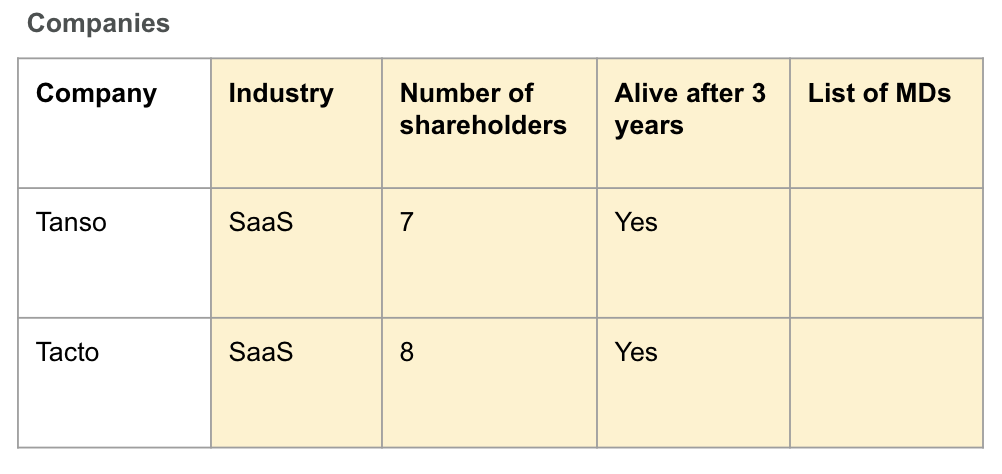


In [ ]:
#create a df with one column called startup id and one called number_shareholders and include zeros for all startups that have no shareholders

number_shareholders = df_shareholder_relations['startup_id'].value_counts()
number_shareholders = number_shareholders.reset_index()
number_shareholders.columns = ['startup_id', 'number_shareholders']
print(number_shareholders)
number_shareholders =pd.DataFrame(number_shareholders)
print(number_shareholders)
df_startups['startup_id'] = df_startups['startup_id'].astype('str')
number_shareholders['startup_id'] = number_shareholders['startup_id'].astype('str')

df_startups_updated = pd.merge(df_startups, number_shareholders, on='startup_id', how='left')

#drop number_shareholders_x and rename number_shareholders_y to number_shareholders
df_startups_updated = df_startups_updated.drop(columns=['number_shareholders_x'])
df_startups_updated = df_startups_updated.rename(columns={'number_shareholders_y': 'number_shareholders'})
# df_startups_updated['number_shareholders'] = df_startups_updated['number_shareholders'].fillna(0)
df_startups_updated
#update number_shareholders in df_startups

     startup_id  number_shareholders
0          2404                   41
1          2186                   40
2         12162                   36
3          8918                   36
4          4741                   36
...         ...                  ...
7384      10116                    1
7385        198                    1
7386      10230                    1
7387        200                    1
7388       3215                    1

[7389 rows x 2 columns]
     startup_id  number_shareholders
0          2404                   41
1          2186                   40
2         12162                   36
3          8918                   36
4          4741                   36
...         ...                  ...
7384      10116                    1
7385        198                    1
7386      10230                    1
7387        200                    1
7388       3215                    1

[7389 rows x 2 columns]


,startup_id,created_at,startup_name,shareholder_json,list_mds,number_angels,startup_industry,startup_purpose,link_shareholder_file_2021,link_SI_file_current,...,startup_location,startup_website,startup_linkedin,startup_industry_mapped,azure_json,error,link_structured_content_file_current,azure_json_2021,shareholder_json_2021,number_shareholders
0,15900,2024-03-07 16:06:33.006627+00,Townsmith UG (haftungsbeschränkt),NaN,NaN,NaN,eCommerce,NaN,NaN,NaN,...,Saarbrücken,https://townsmith.de/,NaN,NaN,NaN,NaN,Townsmith UG haftungsbeschrnkt_Saarbrcken_HRB ...,NaN,NaN,NaN
1,4587,2024-01-17 10:12:54.79246+00,just-organic.com GmbH,NaN,"{""name"":{""0"":4587,""1"":4587,""2"":4587},""total_MD...",NaN,Lebensmittel,"{""gegenstand"": ""Der Betrieb einer Internetplat...",justorganiccom GmbH_Essen_HRB 31344/Liste der ...,justorganiccom GmbH_Essen_HRB 31344/Liste der ...,...,Essen,http://just-organic.com/,NaN,production_trade,NaN,could not add json to shareholdes list,justorganiccom GmbH_Essen_HRB 31344/SI-justorg...,"{""Nr. des Gesch\u00e4fts- anteils"":{""0"":""1 bis...","[{""birthdate"":null,""register_id"":""HRB 30008"",""...",NaN
2,8039,2024-01-17 10:12:57.57515+00,Trading Robotics GmbH,"{""shareholders"":[{""shareholder_name"":""Sokratis...","{""name"":{""0"":8039,""1"":8039},""total_MDs"":{""0"":2...",NaN,Finanzbereich,"{""gegenstand"": ""Die Herstellung von Software f...",Trading Robotics GmbH_Iserlohn_HRB 9359/Liste ...,Trading Robotics GmbH_Iserlohn_HRB 9359/Liste ...,...,Lüdenscheid,https://tradingrobotics.net/,NaN,services_consulting,"{""Ifd. Nr. des Gesch\u00e4ftsan- teils"":{""0"":""...",could not add json to shareholdes list,Trading Robotics GmbH_Iserlohn_HRB 9359/SI-Tra...,"{""Ifd. Nr. des Gesch\u00e4ftsan- teils"":{""0"":""...","[{""birthdate"":""1984-07-26"",""register_id"":null,...",NaN
3,14249,2024-03-07 16:06:31.684443+00,Bausicht UG (haftungsbeschränkt),NaN,NaN,NaN,Bauwesen,NaN,Bausicht GmbH_Mnster_HRB 19820/Liste der Gesel...,NaN,...,Münster,https://www.bausicht.de/,NaN,NaN,NaN,could not add json to shareholdes list,Bausicht GmbH_Mnster_HRB 19820/SI-Bausicht Gmb...,{},"[{""birthdate"":null,""register_id"":""HRB 268779"",...",NaN
4,7487,2024-01-17 10:12:56.69808+00,TrustCerts GmbH,"{""shareholders"":[{""shareholder_name"":""Mirko Mo...","{""name"":{""0"":7487},""total_MDs"":{""0"":1},""gegens...",NaN,Blockchain / Crypto,"{""gegenstand"": ""Entwicklung, Herstellung und V...",TrustCerts GmbH_Gelsenkirchen_HRB 15289/Liste ...,TrustCerts GmbH_Gelsenkirchen_HRB 15289/Liste ...,...,Gelsenkirchen,https://trustcerts.de/,NaN,technology_digital_services,"{""Gesellschafter a) Name b) Wohnort\/Sitz c) G...",could not add json to shareholdes list,TrustCerts GmbH_Gelsenkirchen_HRB 15289/SI-Tru...,"{""Nr. des Gesch\u00e4fts- anteils"":{""0"":""1 bis...","[{""birthdate"":""16.02.1994"",""register_id"":null,...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,11943,2024-01-17 10:13:00.689369+00,Markonia Eyewear Germany GmbH,NaN,"{""name"":{""0"":11943},""total_MDs"":{""0"":1},""gegen...",NaN,eCommerce,"{""gegenstand"": ""Der Import und Export, sowie d...",Markonia Eyewear Germany GmbH_Krefeld_HRB 1657...,NaN,...,Willich,https://www.markonia-eyewear.de,NaN,technology_digital_services,NaN,NaN,Markonia Eyewear Germany GmbH_Krefeld_HRB 1657...,"{""Lfd. Nr(n) Gesch\u00e4fts- anteil(e)"":{""0"":""...","{""shareholders"":[{""shareholder_name"":""Ina Andj...",1.0
14112,6217,2024-01-17 10:12:55.987461+00,Kineo GmbH,"{""shareholders"":[{""shareholder_name"":""Robert K...","{""name"":{""0"":6217,""1"":6217,""2"":6217},""aktenzei...",NaN,Software,"{""gegenstand"": ""Die Entwicklung und das Betrei...",Kineo GmbH_Berlin Charlottenburg_HRB 214020/Li...,Kineo GmbH_Berlin Charlottenburg_HRB 214020/Li...,...,Berlin,https://kineo.ai/,https://www.linkedin.com/company/kineo-ai/,technology_digital_services,"{""Ifd. Nr."":{""0"":""1-8.750"",""1"":""8.751- 17.500""...",NaN,Kineo GmbH_Berlin Charlottenburg_HRB 214020

In [ ]:
#save df_startups_updated as csv
df_startups_updated.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/startups_rows_updated.csv', index=False)

In [ ]:

#get all with  NaN shareholders
df_startups_updated_test = df_startups_updated[df_startups_updated['number_shareholders'].isnull()]

#get all with more than 2 shareholders
df_startups_updated_test_2 = df_startups_updated[df_startups_updated['number_shareholders'] > 2]
print(len(df_startups_updated_test))
print(len(df_startups_updated_test_2))
print(len(df_startups_updated_test_2+df_startups_updated_test))
print(len(df_startups_updated))

6727
3474
10201
14116
